# Random Lattice Generators Are Not Bad


In [16]:
import qmcpy as qp
import numpy as np  #basic numerical routines in Python
import time  #timing routines
from matplotlib import pyplot;  #plotting

pyplot.rc('font', size=16)  #set defaults so that the plots are readable
pyplot.rc('axes', titlesize=16)
pyplot.rc('axes', labelsize=16)
pyplot.rc('xtick', labelsize=16)
pyplot.rc('ytick', labelsize=16)
pyplot.rc('legend', fontsize=16)
pyplot.rc('figure', titlesize=16)

#a helpful plotting method to show increasing numbers of points
def plot_successive_points(distrib,ld_name,first_n=64,n_cols=1,pt_clr='bgkcmy',
                           xlim=[0,1],ylim=[0,1],coord1 = 0,coord2 = 1):
  fig,ax = pyplot.subplots(nrows=1,ncols=n_cols,figsize=(5*n_cols,5.5))
  if n_cols==1: ax = [ax]
  last_n = first_n*(2**n_cols)
  points = distrib.gen_samples(n=last_n)
  for i in range(n_cols):
    n = first_n
    nstart = 0
    for j in range(i+1):
      n = first_n*(2**j)
      ax[i].scatter(points[nstart:n,coord1],points[nstart:n,coord2],color=pt_clr[j])
      nstart = n
    ax[i].set_title('n = %d'%n)
    ax[i].set_xlim(xlim); ax[i].set_xticks(xlim); ax[i].set_xlabel('$x_{i,%d}$'%(coord1+1))
    ax[i].set_ylim(ylim); ax[i].set_yticks(ylim); ax[i].set_ylabel('$x_{i,%d}$'%(coord2+1))
    ax[i].set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
  fig.suptitle('%s Points'%ld_name)

## Lattice Declaration and the gen_samples function

In [17]:
lat = qp.Lattice()
help(lat.__init__)

Help on method __init__ in module qmcpy.discrete_distribution.lattice.lattice:

__init__(dimension=1, replications=None, seed=None, randomize='SHIFT', generating_vector='kuo.lattice-33002-1024-1048576.9125.txt', order='NATURAL', m_max=None) method of qmcpy.discrete_distribution.lattice.lattice.Lattice instance
    Args:
        dimension (Union[int,np.ndarray]): Dimension of the generator.
    
            - If an `int` is passed in, use generating vector components at indices 0,...,`dimension`-1.
            - If an `np.ndarray` is passed in, use generating vector components at these indices.
        
        replications (int): Number of independent randomizations.
        seed (Union[None,int,np.random.SeedSeq): Seed the random number generator for reproducibility.
        randomize (str): Options are 
            
            - `'SHIFT'`: Random shift.
            - `'FALSE'`: No randomization. In this case the first point will be the origin. 
        
        generating_vector (Un

In [18]:
help(lat.gen_samples)

Help on method gen_samples in module qmcpy.discrete_distribution.abstract_discrete_distribution:

gen_samples(n=None, n_min=None, n_max=None, return_binary=False, warn=True) method of qmcpy.discrete_distribution.lattice.lattice.Lattice instance



### Driver code

In [19]:
lat = qp.Lattice(dimension = 2,randomize= True, generating_vector=21, seed = 120) 
print("Basic information of the lattice:")
print(lat)

print("\nA sample lattice generated by the random generating vector: ")

n = 16 #number of points in the sample
print(lat.gen_samples(n))

Basic information of the lattice:
Lattice (AbstractLDDiscreteDistribution)
    d               2^(1)
    replications    1
    randomize       SHIFT
    gen_vec_source  random
    order           NATURAL
    n_limit         2^(21)
    entropy         120

A sample lattice generated by the random generating vector: 
[[0.34548142 0.46736834]
 [0.84548142 0.96736834]
 [0.59548142 0.21736834]
 [0.09548142 0.71736834]
 [0.47048142 0.84236834]
 [0.97048142 0.34236834]
 [0.72048142 0.59236834]
 [0.22048142 0.09236834]
 [0.40798142 0.15486834]
 [0.90798142 0.65486834]
 [0.65798142 0.90486834]
 [0.15798142 0.40486834]
 [0.53298142 0.52986834]
 [0.03298142 0.02986834]
 [0.78298142 0.27986834]
 [0.28298142 0.77986834]]


### Plots of lattices

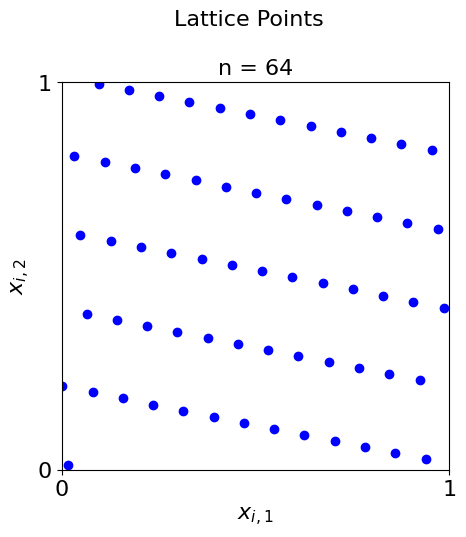

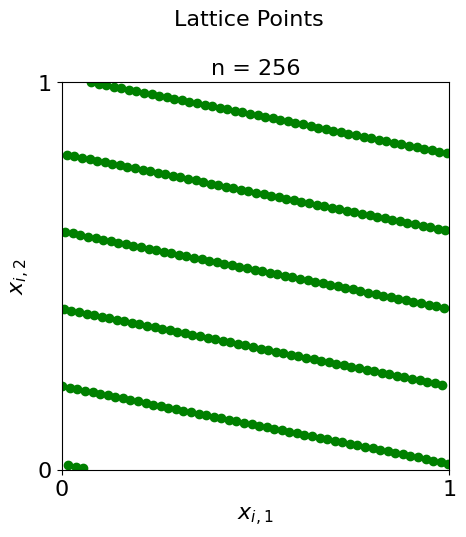

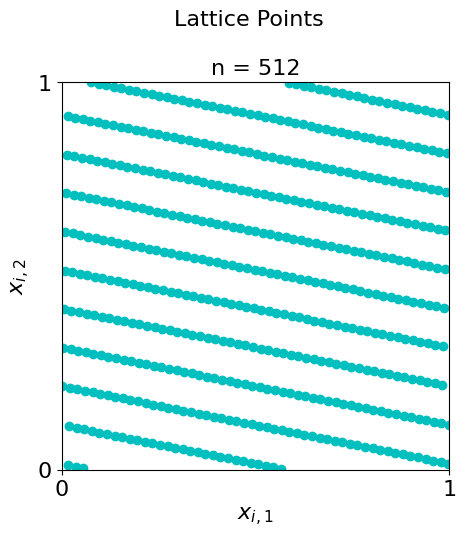

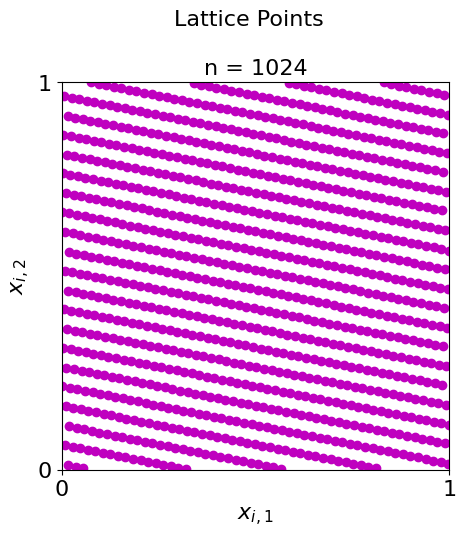

In [20]:
#Here the sample sizes are prime numbers
lat = qp.Lattice(dimension=2,generating_vector= 16,seed = 136, order="GRAY")
    
primes = [64,256,512,1024]

for i in range(len(primes)):
    plot_successive_points(distrib = lat,ld_name = "Lattice",first_n=primes[i],pt_clr="bgcmr"[i])


## Integration


### Runtime comparison between random generator and hard-conded generator

In [21]:
import warnings
warnings.simplefilter('ignore')

d = 5  #coded as parameters so that 
tol = 1E-3 #you can change here and propagate them through this example

data_random = qp.CubQMCLatticeG(qp.Keister(qp.Gaussian(qp.Lattice(d,generating_vector = 26), mean = 0, covariance = 1/2)), abs_tol = tol).integrate()[1]
data_default = qp.CubQMCLatticeG(qp.Keister(qp.Gaussian(qp.Lattice(d), mean = 0, covariance = 1/2)),  abs_tol = tol).integrate()[1]
print("Integration data from a random lattice generator:")
print(data_random)
print("\nIntegration data from the default lattice generator:")
print(data_default)



Integration data from a random lattice generator:
Data (Data)
    solution        1.135
    comb_bound_low  1.135
    comb_bound_high 1.136
    comb_bound_diff 0.001
    comb_flags      1
    n_total         2^(17)
    n               2^(17)
    time_integrate  0.153
CubQMCLatticeG (AbstractStoppingCriterion)
    abs_tol         0.001
    rel_tol         0
    n_init          2^(10)
    n_limit         2^(30)
Keister (AbstractIntegrand)
Gaussian (AbstractTrueMeasure)
    mean            0
    covariance      2^(-1)
    decomp_type     PCA
    transform       Gaussian (AbstractTrueMeasure)
                        mean            0
                        covariance      2^(-1)
                        decomp_type     PCA
Lattice (AbstractLDDiscreteDistribution)
    d               5
    replications    1
    randomize       SHIFT
    gen_vec_source  random
    order           NATURAL
    n_limit         2^(26)
    entropy         253523607185012067649885865695647709066

Integration data 

### Mean vs. Median as a function of the sample size plot


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 


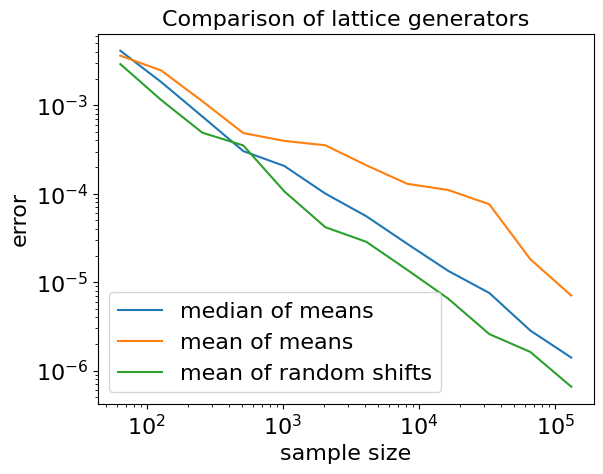

In [ ]:
#mean vs. median plot
import qmcpy as qp
import numpy as np
import matplotlib.pyplot as plt



d = 2
N_min = 6
N_max = 18
N_list = 2**np.arange(N_min,N_max)
r = 11
num_trials = 25


error_median = np.zeros(N_max - N_min) 
error_mean = np.zeros(N_max - N_min) 
error_mean_onegen = np.zeros(N_max - N_min) 
for i in range(num_trials):
    y_median = []
    y_mean = []
    y_mean_one_gen = []
    print("%d, "%i,end='',flush=True)
    list_of_keister_objects_random = []
    list_of_keister_objects_default = []
    y_randomized_list = []
    y_default_list = []
    for k in range(r):
        lattice = qp.Lattice(generating_vector = 26,dimension=d)
        keister = qp.Keister(lattice)
        list_of_keister_objects_random.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)
        y_randomized_list.append(y)
        keister = qp.Keister(qp.Lattice(d))
        list_of_keister_objects_default.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)    
        y_default_list.append(y) 
            
    for N in N_list:

        y_median.append(np.median([np.mean(y[:N]) for y in y_randomized_list]))
        y_mean_one_gen.append(np.mean([np.mean(y[:N]) for y in y_default_list]))
        y_mean.append(np.mean([np.mean(y[:N]) for y in y_randomized_list]))

    answer = keister.exact_integ(d)
    error_median += abs(answer-y_median)
    error_mean += abs(answer-y_mean)
    error_mean_onegen += abs(answer-y_mean_one_gen)
print()

error_median /= num_trials
error_mean /= num_trials
error_mean_onegen /= num_trials

plt.loglog(N_list,error_median,label = "median of means")
plt.loglog(N_list,error_mean,label = "mean of means")
plt.loglog(N_list,error_mean_onegen,label = "mean of random shifts")
plt.xlabel("sample size")
plt.ylabel("error")
plt.title("Comparison of lattice generators")
plt.legend()
# plt.savefig("./meanvsmedian.png")
